**Random Forest**

**Results and Metrices**

Accuracy (Random Forest Classifier): 0.8739495798319328
Precision: 0.8830855419090714
Recall: 0.8739495798319328
F1 Score: 0.8731036319451381

Classification Report:
              precision    recall  f1-score   support

           0       0.67      1.00      0.80         6
           1       0.85      0.92      0.88        12
           2       0.00      0.00      0.00         3
           3       1.00      0.50      0.67         2
           4       0.93      0.88      0.90        16
           5       0.33      0.67      0.44         3
           6       1.00      0.90      0.95        20
           7       1.00      0.90      0.95        10
           8       1.00      1.00      1.00        11
           9       0.80      0.80      0.80        10
          10       0.92      0.92      0.92        26

    accuracy                           0.87       119
   macro avg       0.77      0.77      0.76       119
weighted avg       0.88      0.87      0.87       119


Confusion Matrix:


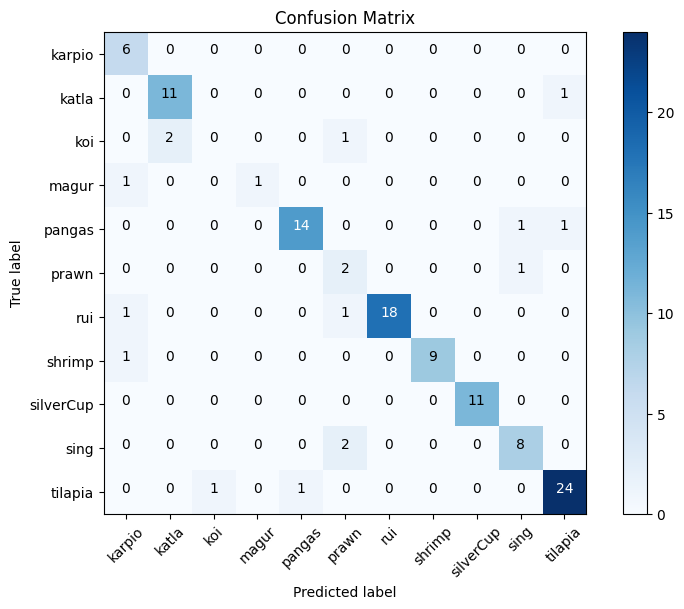

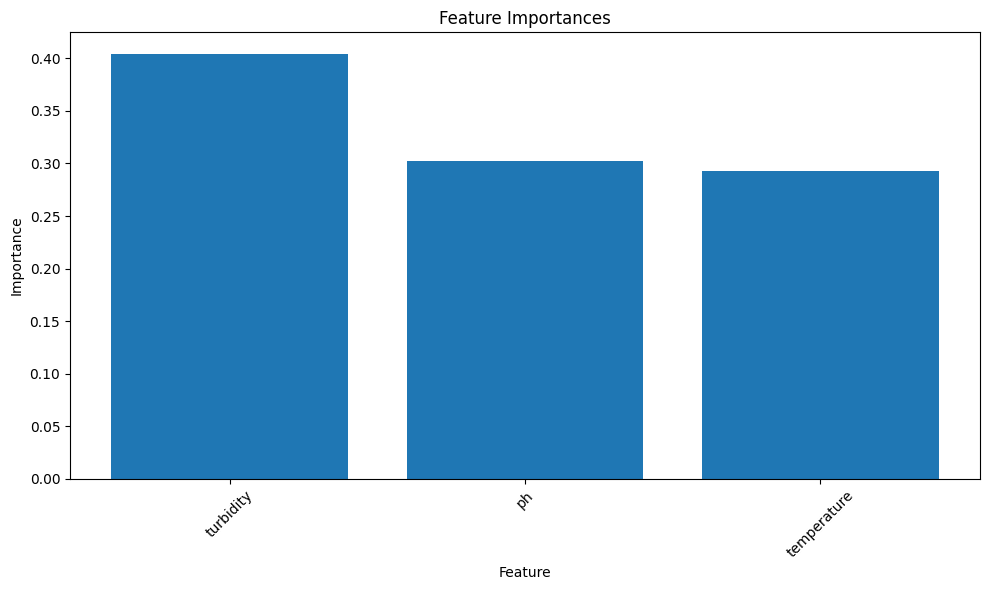

Based on the provided input, the predicted fish species is: karpio


C:\Users\INFINIX\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# Load data from CSV file
df = pd.read_csv("Dataset/realfishdataset.csv")

# Encode categorical target variable into integers
label_encoder = LabelEncoder()
df['fish_encoded'] = label_encoder.fit_transform(df['fish'])

# Splitting the data into features and target
X = df[['ph', 'temperature', 'turbidity']]
y = df['fish_encoded']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Handling class imbalance with SMOTE during training only
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_scaled, y_train)

# Tune Random Forest Classifier hyperparameters using GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
rf_classifier = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(rf_classifier, param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train_balanced, y_train_balanced)
best_rf_classifier = grid_search.best_estimator_

# Making predictions using the best Random Forest Classifier
y_pred_rf = best_rf_classifier.predict(X_test_scaled)

# Calculating accuracy
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Accuracy (Random Forest Classifier):", accuracy_rf)

#Metrices 
precision = precision_score(y_test, y_pred_rf, average='weighted')
recall = recall_score(y_test, y_pred_rf, average='weighted')
f1 = f1_score(y_test, y_pred_rf, average='weighted')
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))

print("\nConfusion Matrix:")
conf_matrix = confusion_matrix(y_test, y_pred_rf)

# Plot and save confusion matrix as an image
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()
classes = label_encoder.classes_
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

fmt = 'd'
thresh = conf_matrix.max() / 2.
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        plt.text(j, i, format(conf_matrix[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if conf_matrix[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.savefig("confusion_matrix.png")  
plt.show() 

#Feature Importance 
plt.figure(figsize=(10, 6))
feature_importances = best_rf_classifier.feature_importances_
indices = np.argsort(feature_importances)[::-1]
plt.bar(range(X.shape[1]), feature_importances[indices], align="center")
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=45)
plt.title("Feature Importances")
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.tight_layout()
plt.savefig("feature_importance.png")
plt.show()  
